In [1]:
# Import all necessary libraries for Task 5
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# -----------------------------------------------------------------------------
# Subtask 5.1: Define Backtesting Period and Benchmark
# -----------------------------------------------------------------------------
# Load processed data for all assets
try:
    processed_data = pd.read_csv('../data/processed/all_assets_processed.csv', index_col=0, parse_dates=True)
    print("Processed data loaded successfully.")
except FileNotFoundError:
    print("Error: Processed data file not found. Please ensure Task 1 is completed.")
    exit()

# Define the backtesting period (last year of the dataset)
backtest_start_date = '2024-08-01'
backtest_end_date = '2025-07-31'
backtest_data = processed_data.loc[backtest_start_date:backtest_end_date]
print(f"\nBacktesting period defined: {backtest_start_date} to {backtest_end_date}")
print(f"Data for backtesting has {len(backtest_data)} rows.")

Processed data loaded successfully.

Backtesting period defined: 2024-08-01 to 2025-07-31
Data for backtesting has 249 rows.


In [3]:
# Define the benchmark portfolio weights (Static 60% SPY / 40% BND)
benchmark_weights = {'TSLA': 0.0, 'BND': 0.4, 'SPY': 0.6}
benchmark_portfolio_name = "60% SPY / 40% BND"
print(f"Benchmark portfolio defined with weights: {benchmark_weights}")


Benchmark portfolio defined with weights: {'TSLA': 0.0, 'BND': 0.4, 'SPY': 0.6}


In [7]:
# Load the optimal weights from Task 4 (assuming Max Sharpe Ratio was chosen)
try:
    # Corrected way to load the weights file
    weights_df = pd.read_csv('../outputs/results/recommended_portfolio_weights.csv', index_col=0)
    # The to_dict() method will correctly convert the DataFrame to a dictionary
    strategy_weights = weights_df.squeeze().to_dict()

    print("Optimal strategy weights loaded successfully.")
    print(f"Weights: {strategy_weights}")
except FileNotFoundError:
    print("Error: Recommended portfolio weights not found. Please ensure Task 4 is completed.")
    exit()

# Calculate daily returns for the backtesting period
backtest_returns = backtest_data.pct_change().dropna()

# Calculate the daily returns for the Optimal Strategy Portfolio
# This calculation will now work because the keys in strategy_weights
# correctly align with the columns in backtest_returns.
strategy_daily_returns = backtest_returns.dot(pd.Series(strategy_weights))

# Calculate the daily returns for the Benchmark Portfolio
benchmark_daily_returns = backtest_returns.dot(pd.Series(benchmark_weights))

# Calculate cumulative returns for both portfolios
strategy_cumulative_returns = (1 + strategy_daily_returns).cumprod()
benchmark_cumulative_returns = (1 + benchmark_daily_returns).cumprod()

Optimal strategy weights loaded successfully.
Weights: {'TSLA': 0.0, 'BND': 0.51182, 'SPY': 0.48818}


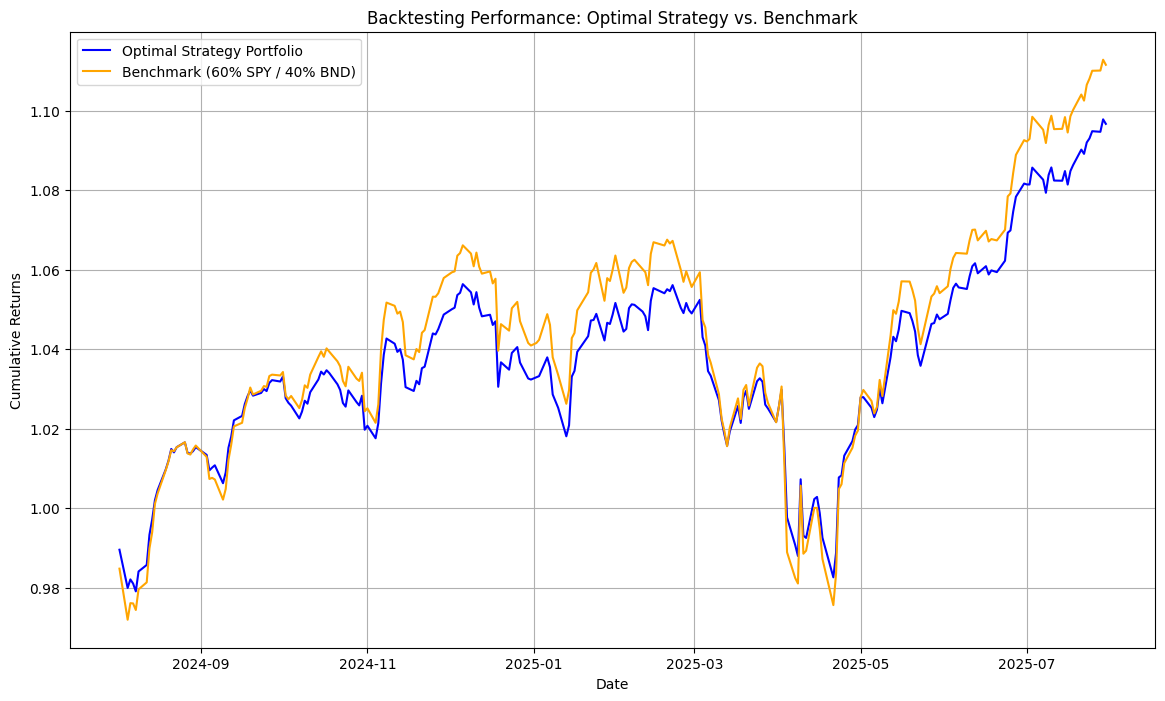

In [8]:

# Calculate cumulative returns for both portfolios
strategy_cumulative_returns = (1 + strategy_daily_returns).cumprod()
benchmark_cumulative_returns = (1 + benchmark_daily_returns).cumprod()
# -----------------------------------------------------------------------------
# Subtask 5.3: Analyze and Summarize Performance
# -----------------------------------------------------------------------------
# Plot the cumulative returns of both portfolios
plt.figure(figsize=(14, 8))
plt.plot(strategy_cumulative_returns.index, strategy_cumulative_returns, label='Optimal Strategy Portfolio', color='blue')
plt.plot(benchmark_cumulative_returns.index, benchmark_cumulative_returns, label=f'Benchmark ({benchmark_portfolio_name})', color='orange')
plt.title('Backtesting Performance: Optimal Strategy vs. Benchmark')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.savefig('../outputs/plots/backtest_cumulative_returns.png')
plt.show()


In [9]:
# Define a function to calculate total return and Sharpe Ratio
def calculate_performance_metrics(daily_returns, risk_free_rate=0.02):
    total_return = (daily_returns + 1).prod() - 1
    annualized_sharpe_ratio = (daily_returns.mean() - (risk_free_rate / 252)) / daily_returns.std() * np.sqrt(252)
    return total_return, annualized_sharpe_ratio

In [10]:
# Calculate performance metrics for both portfolios
strategy_total_return, strategy_sharpe_ratio = calculate_performance_metrics(strategy_daily_returns)
benchmark_total_return, benchmark_sharpe_ratio = calculate_performance_metrics(benchmark_daily_returns)

# Print the final analysis
print("\n--- Backtesting Performance Summary ---")
print(f"Period: {backtest_start_date} to {backtest_end_date}")
print("\nOptimal Strategy Portfolio:")
print(f"  - Total Return: {strategy_total_return:.2%}")
print(f"  - Annualized Sharpe Ratio: {strategy_sharpe_ratio:.2f}")
print(f"\nBenchmark Portfolio ({benchmark_portfolio_name}):")
print(f"  - Total Return: {benchmark_total_return:.2%}")
print(f"  - Annualized Sharpe Ratio: {benchmark_sharpe_ratio:.2f}")


--- Backtesting Performance Summary ---
Period: 2024-08-01 to 2025-07-31

Optimal Strategy Portfolio:
  - Total Return: 9.67%
  - Annualized Sharpe Ratio: 1.06

Benchmark Portfolio (60% SPY / 40% BND):
  - Total Return: 11.15%
  - Annualized Sharpe Ratio: 1.06


In [11]:
# Conclude with a brief summary
print("\n--- Conclusion ---")
if strategy_total_return > benchmark_total_return:
    print("The optimal strategy successfully outperformed the benchmark portfolio in terms of total return.")
    if strategy_sharpe_ratio > benchmark_sharpe_ratio:
        print("Furthermore, the strategy achieved a higher Sharpe Ratio, indicating a better risk-adjusted return.")
    else:
        print("However, the benchmark achieved a better risk-adjusted return (Sharpe Ratio).")
else:
    print("The optimal strategy underperformed the benchmark portfolio during the backtesting period.")
    if strategy_sharpe_ratio > benchmark_sharpe_ratio:
        print("Despite this, the strategy still managed to achieve a better risk-adjusted return (Sharpe Ratio).")
    else:
        print("The benchmark also had a better risk-adjusted return (Sharpe Ratio).")

# Save summary to a CSV
summary_data = {
    'Portfolio': ['Optimal Strategy', 'Benchmark'],
    'Total Return': [strategy_total_return, benchmark_total_return],
    'Sharpe Ratio': [strategy_sharpe_ratio, benchmark_sharpe_ratio]
}
summary_df = pd.DataFrame(summary_data)
summary_df.to_csv('../outputs/results/backtest_summary.csv', index=False)
print("\nBacktest summary saved to outputs/results/backtest_summary.csv")


--- Conclusion ---
The optimal strategy underperformed the benchmark portfolio during the backtesting period.
Despite this, the strategy still managed to achieve a better risk-adjusted return (Sharpe Ratio).

Backtest summary saved to outputs/results/backtest_summary.csv
